In [1]:
try:
    import tensorflow as tf

    # For Data Processing
    import numpy as np
    import pandas as pd

    # For Plotting
    import matplotlib.pyplot as plt

    # For Data Processing
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix,classification_report

    print('Library Loaded .........')
except:
    print('One or More Library was not Found ! ')

Library Loaded .........


In [34]:
    def readTrainTestData():

        names = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
                 'Species']

        path = "/Users/soumilshah/IdeaProjects/mytensorflow/Dataset/Iris.csv"
        df = pd.read_csv(path,names=names,header=0)
        
        columns_norm = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

        X_Data = df[columns_norm]
        X_Data = X_Data.apply(lambda x:( (x - x.min()) / (x.max()-x.min())))

        Y_Data = df["Species"]
        Y_Data = df["Species"].map({
            "Iris-setosa":0,
            "Iris-virginica":1,
            "Iris-versicolor":2})
        
        X_Train, X_Test, Y_Train,Y_Test = train_test_split(X_Data,
                                                           Y_Data,
                                                           test_size=0.3,
                                                           random_state=101)

        return X_Train, X_Test , Y_Train, Y_Test

In [35]:
def create_feature_column():
    
    feat_SepalLengthCm = tf.feature_column.numeric_column('SepalLengthCm')
    feat_SepalWidthCm = tf.feature_column.numeric_column('SepalWidthCm')
    feat_PetalLengthCm = tf.feature_column.numeric_column('PetalLengthCm')
    feat_PetalWidthCm = tf.feature_column.numeric_column('PetalWidthCm')

    feature_column = [feat_SepalLengthCm,feat_SepalWidthCm,feat_PetalLengthCm,feat_PetalWidthCm] 

    return feature_column

In [36]:
X_Train, X_Test , Y_Train, Y_Test = readTrainTestData()
feature_column = create_feature_column()

input_func = tf.estimator.inputs.pandas_input_fn(x=X_Train, y=Y_Train,
                                                 batch_size=40,num_epochs =1000, 
                                                 shuffle=True)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_Test,
                                                      y=Y_Test,
                                                      batch_size=40,
                                                      num_epochs=1,
                                                      shuffle=False)

predict_input_fn = tf.estimator.inputs.pandas_input_fn(
      x=X_Test,
      num_epochs=1,
      shuffle=False)

In [37]:
model = tf.estimator.LinearClassifier(feature_columns=feature_column, 
                                      n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp6s3putae', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2fd4e630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
history = model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp6s3putae/model.ckpt.
INFO:tensorflow:loss = 43.944492, step = 1
INFO:tensorflow:global_step/sec: 464.572
INFO:tensorflow:loss = 19.601017, step = 101 (0.215 sec)
INFO:tensorflow:global_step/sec: 654.39
INFO:tensorflow:loss = 15.505865, step = 201 (0.154 sec)
INFO:tensorflow:global_step/sec: 660.546
INFO:tensorflow:loss = 13.558726, step = 301 (0.152 sec)
INFO:tensorflow:global_step/sec: 586.073
INFO:tensorflow:loss = 11.6261635, step = 401 (0.170 sec)
INFO:tensorflow:global_step/sec: 643.679
INFO:tensorflow:loss = 8.653613, step = 501 (0.156 sec)
INFO:tensorflow:global_step/s

In [39]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-02T22:40:18Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp6s3putae/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-02-22:40:18
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.95555556, average_loss = 0.27173388, global_step = 1000, loss = 6.1140122
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp6s3putae/model.ckpt-1000


In [40]:
results["accuracy"]

0.95555556

In [41]:
predictions = list(model.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/7gktt0ls0fj77fnrs694ht6m0000gn/T/tmp6s3putae/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


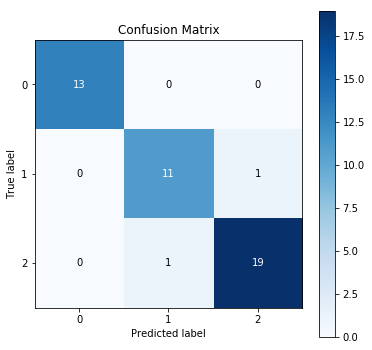

In [43]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                   figsize=(6,6),
                                   title="Confusion Matrix")